In [ ]:
import numpy as np
import ot
import pandas as pd
from collections import defaultdict
import seaborn as sns
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True, connected=True)
%matplotlib widget
import matplotlib.pyplot as plt
import TiOT_lib


In [2]:
file_path = 'DailyDelhiClimateTrain.csv'
data = pd.read_csv(file_path)
df = pd.DataFrame(data)
# Ensure 'date' is a datetime object
df['date'] = pd.to_datetime(df['date'])

# Set the date as the index if needed (optional)
df.set_index('date', inplace=True)

# Lag-experiment part

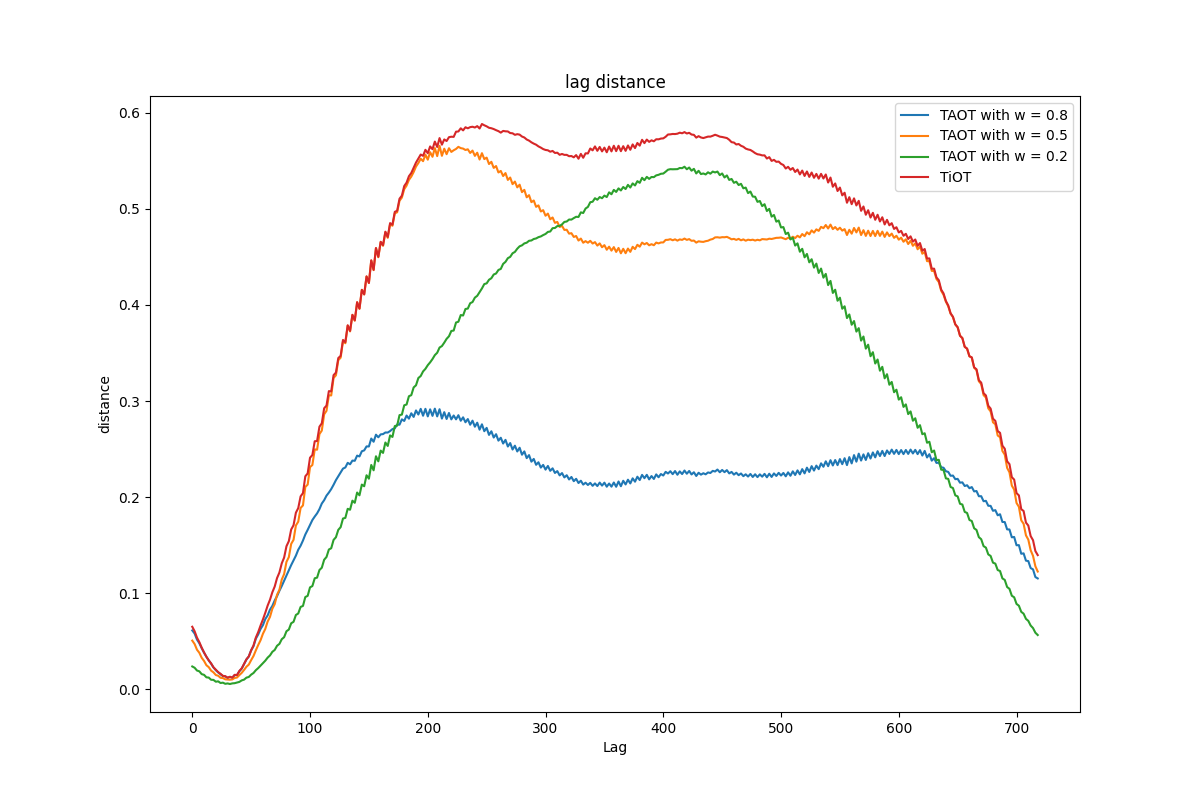

In [ ]:
TAOT_dist1 = []
TAOT_dist2 = []
TAOT_dist3 = []
TiOT_dist = []
for lag in range(0,360,1):
    TAOT_dist1.append(TiOT_lib.TAOT(df['meantemp'].iloc[:end:step], df['meantemp'].iloc[lag:lag+end-30:step], w = 0.8 , costmatrix=TiOT_lib.costmatrix4)[0])
    TAOT_dist2.append(TiOT_lib.TAOT(df['meantemp'].iloc[:end:step], df['meantemp'].iloc[lag:lag+end-30:step], w = 0.5 , costmatrix=TiOT_lib.costmatrix4)[0])
    TAOT_dist3.append(TiOT_lib.TAOT(df['meantemp'].iloc[:end:step], df['meantemp'].iloc[lag:lag+end-30:step], w = 0.2 , costmatrix=TiOT_lib.costmatrix4)[0])
    TiOT_dist.append(TiOT_lib.TiOT(df['meantemp'].iloc[:end:step], df['meantemp'].iloc[lag:lag+end-30:step])[0])

plt.figure(figsize=(12,8))
plt.plot(range(0,720,2),TAOT_dist1, label = "TAOT with w = 0.8")
np.savetxt("TAOT_dist1.txt", np.array(TAOT_dist1))

plt.plot(range(0,720,2), TAOT_dist2, label = "TAOT with w = 0.5")
np.savetxt("TAOT_dist2.txt", np.array(TAOT_dist2))

plt.plot(range(0,720,2), TAOT_dist3, label = "TAOT with w = 0.2")
np.savetxt("TAOT_dist3.txt", np.array(TAOT_dist3))

plt.plot(range(0,720,2), TiOT_dist, label = "TiOT")
np.savetxt("TiOT_dist.txt", np.array(TiOT_dist))


plt.title(f'lag distance')
plt.xlabel('Lag')
plt.ylabel('distance')
plt.legend() 
plt.savefig("Lag graph.png")
# Show the heatmap
plt.show()

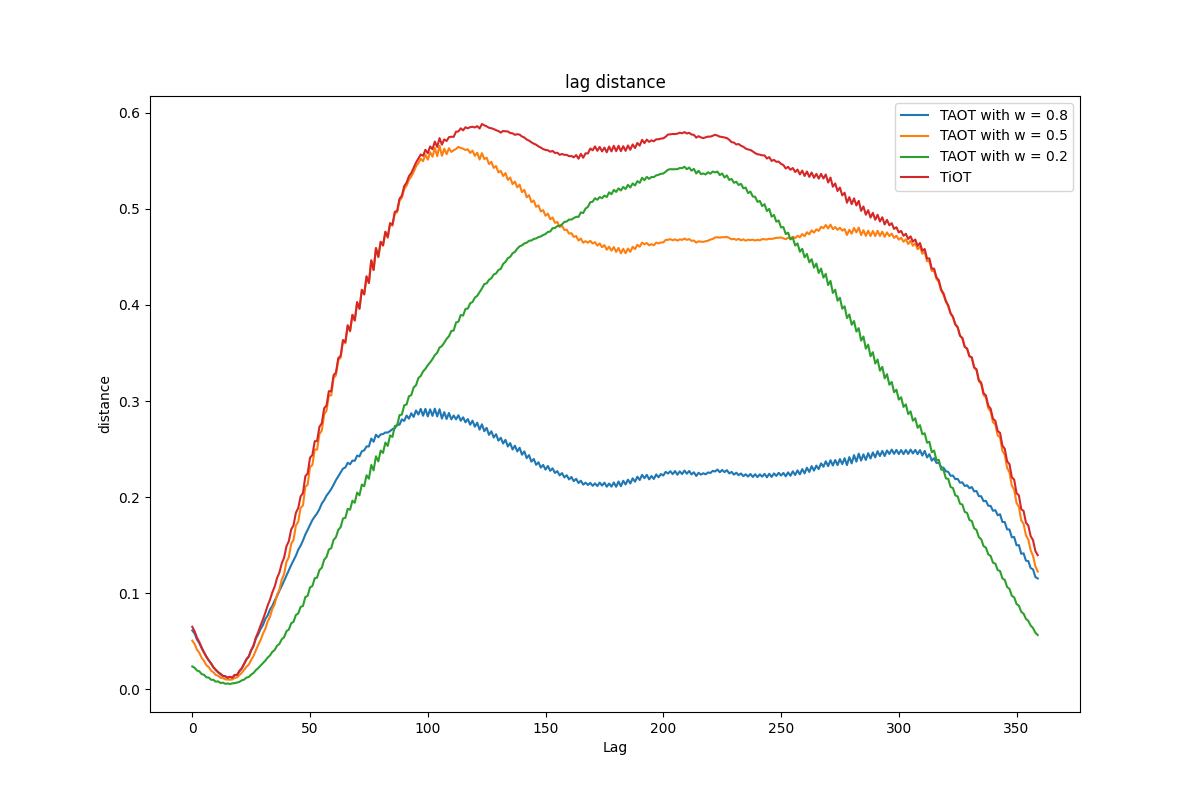

In [ ]:
TAOT_dist1 = []
TAOT_dist2 = []
TAOT_dist3 = []
TiOT_dist = []

TAOT_dist1 = np.loadtxt('TAOT_dist1.txt')
TAOT_dist2 = np.loadtxt('TAOT_dist2.txt')
TAOT_dist3 = np.loadtxt('TAOT_dist3.txt')
TiOT_dist = np.loadtxt("TiOT_dist.txt")
plt.figure(figsize=(12,8))
plt.plot(range(0,360,1),TAOT_dist1, label = "TAOT with w = 0.8")

plt.plot(range(0,360,1), TAOT_dist2, label = "TAOT with w = 0.5")

plt.plot(range(0,360,1), TAOT_dist3, label = "TAOT with w = 0.2")

plt.plot(range(0,360,1), TiOT_dist, label = "TiOT")


plt.title(f'lag distance')
plt.xlabel('Lag')
plt.ylabel('distance')
plt.legend() 
plt.savefig("Lag graph.png")
# Show the heatmap
plt.show()

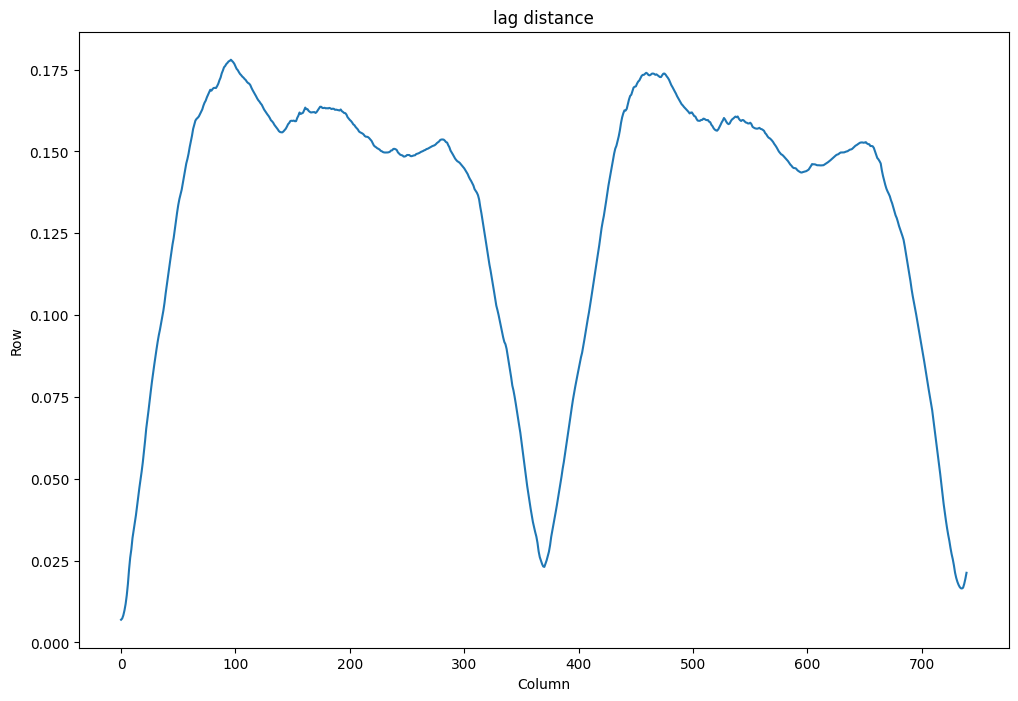

In [ ]:
lag_distances = []
for lag in range(740):
    lag_distances.append(TiOT_lib.TAOT_distance(df.iloc[0:366]['meantemp'].to_list(), df.iloc[lag:366+lag]['meantemp'].to_list(), w = 10)[0])

plt.figure(figsize=(12,8))
plt.plot(lag_distances)
plt.title(f'lag distance')
plt.xlabel('Column')
plt.ylabel('Row')

# Show the heatmap
plt.show()

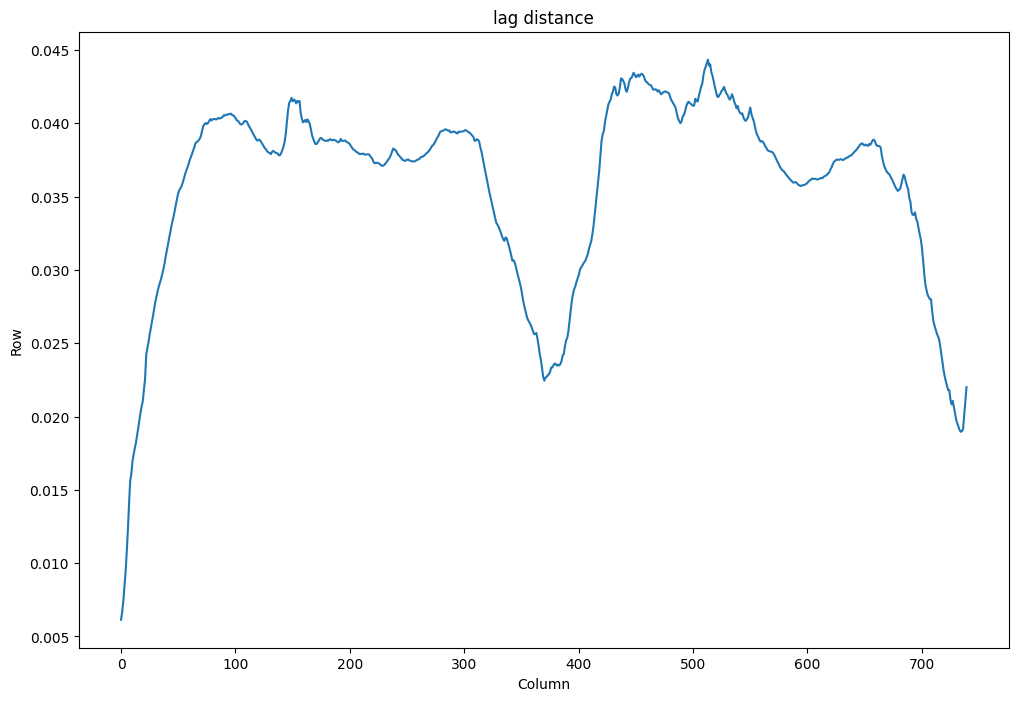

In [ ]:
lag_distances = []
for lag in range(740):
    lag_distances.append(TiOT_lib.TAOT_distance(df.iloc[0:366]['meantemp'].to_list(), df.iloc[lag:366+lag]['meantemp'].to_list(), w = 1)[0])

plt.figure(figsize=(12,8))
plt.plot(lag_distances)
plt.title(f'lag distance')
plt.xlabel('Column')
plt.ylabel('Row')

# Show the heatmap
plt.show()

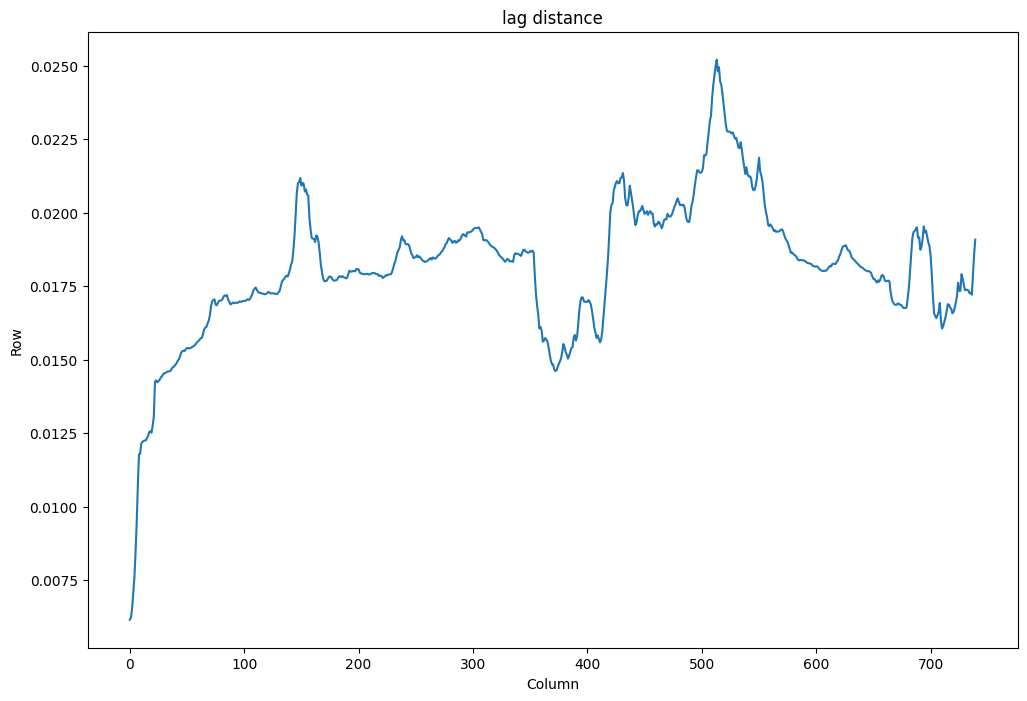

In [ ]:
lag_distances = []
for lag in range(740):
    lag_distances.append(TiOT_lib.TAOT_distance(df.iloc[0:366]['meantemp'].to_list(), df.iloc[lag:366+lag]['meantemp'].to_list(), w = 0.1)[0])

plt.figure(figsize=(12,8))
plt.plot(lag_distances)
plt.title(f'lag distance')
plt.xlabel('Column')
plt.ylabel('Row')

# Show the heatmap
plt.show()

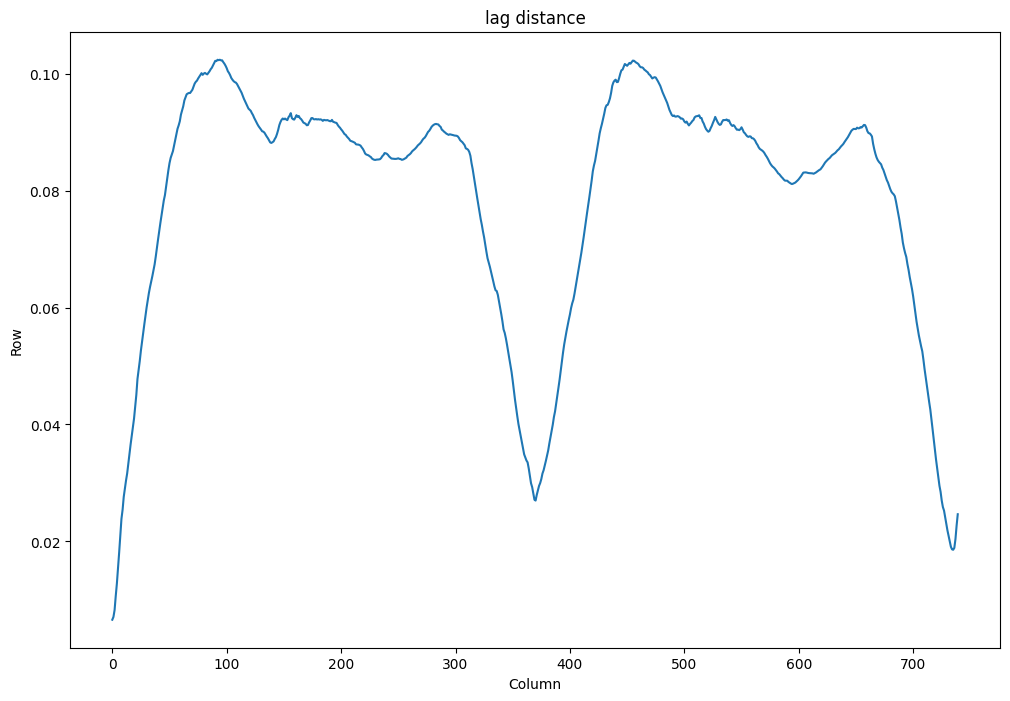

In [ ]:
lag_distances = []
for lag in range(740):
    lag_distances.append(TiOT_lib.TAOT_distance(df.iloc[0:366]['meantemp'].to_list(), df.iloc[lag:366+lag]['meantemp'].to_list(), w = 4)[0])

plt.figure(figsize=(12,8))
plt.plot(lag_distances)
plt.title(f'lag distance')
plt.xlabel('Column')
plt.ylabel('Row')

# Show the heatmap
plt.show()

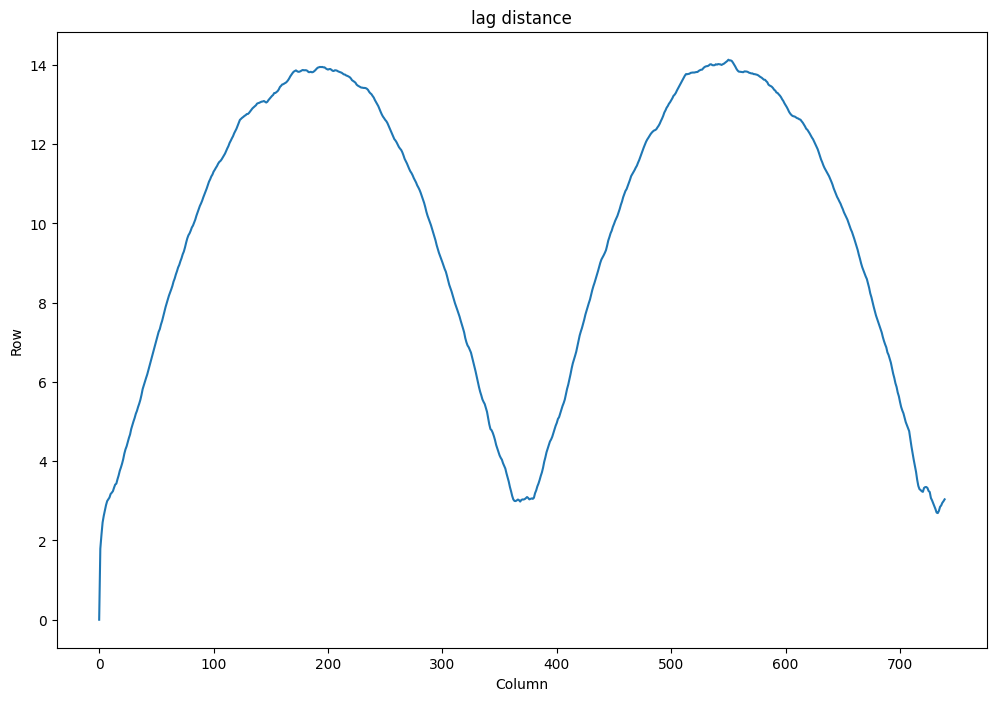

In [ ]:
lag_distances = []
for lag in range(740):
    lag_distances.append(TiOT_lib.euclid_dist(df.iloc[0:366]['meantemp'].to_numpy(), df.iloc[lag:366+lag]['meantemp'].to_numpy() )[0])

plt.figure(figsize=(12,8))
plt.plot(lag_distances)
plt.title(f'lag distance')
plt.xlabel('Column')
plt.ylabel('Row')

plt.show()